#### Import required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

In [3]:
print(tf.__version__)

2.5.0


#### Import data

In [4]:
df=pd.read_csv("C:/Users/Saberi/Desktop/New folder/neural network/Proj1/Proj1_Data.csv")

#### Get familiar with  the data

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


As you can see, we have no null data.

Now let's see if we have unique users

In [165]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

We specify users by Customer ID, therefore we have 10000 unique users. So, Row number, Customer Id and Surname will not be intuitive variables in our network and we're gonna omit them in the followng steps.

In [166]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In the above table you can see mean and std of some valuable variables. Also, according to the minimum and maximum values of variables, there are no nonordinary values in the data-set.

In [167]:
#omitting unnecessary variables
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Now it's time to fix the encoding of our categorical variables like Gender and Geography.
We'll going to use dummy variable generator of pandas library.

In [168]:
Geo=pd.get_dummies(df["Geography"])
Gen=pd.get_dummies(df["Gender"])
print(Geo)
print(Gen)

      France  Germany  Spain
0          1        0      0
1          0        0      1
2          1        0      0
3          1        0      0
4          0        0      1
...      ...      ...    ...
9995       1        0      0
9996       1        0      0
9997       1        0      0
9998       0        1      0
9999       1        0      0

[10000 rows x 3 columns]
      Female  Male
0          1     0
1          1     0
2          1     0
3          1     0
4          1     0
...      ...   ...
9995       0     1
9996       0     1
9997       1     0
9998       0     1
9999       1     0

[10000 rows x 2 columns]


In [169]:
#adding the hot-encoded variables to the main dataset and dropping the label-encoded ones
df=pd.concat([df,Geo,Gen],axis=1)
df=df.drop(['Geography','Gender'],axis=1)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [170]:
#changing the the name of NumOfProducts column to a more intuitive one
df = df.rename(columns={'NumOfProducts': 'Num_of_accounts'})

Before spliting data into test and train segments, we'll scale some of the variables to help the learning process speed up.

#### Feature scaling

binary variables(0&1) do not need to be scaled but other than those, any variable who has a range outside of [-3 ,3] , needs to be scaled.

standard scalling **EstimatedSalary**,**Balance**,**Age**, **CreditScore** and **Tenure** variables :

In [171]:
df['EstimatedSalary']= (df['EstimatedSalary'] - np.mean(df['EstimatedSalary']))/np.std(df['EstimatedSalary'])
df['Balance']=(df['Balance'] - np.mean(df['Balance']))/np.std(df['Balance'])
df['Age']=(df['Age'] - np.mean(df['Age']))/np.std(df['Age'])
df['CreditScore']=(df['CreditScore'] - np.mean(df['CreditScore']))/np.std(df['CreditScore'])
df['Tenure']=(df['Tenure'] - np.mean(df['Tenure']))/np.std(df['Tenure'])

In [172]:
df

,CreditScore,Age,Tenure,Balance,Num_of_accounts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,-0.326221,0.293517,-1.041760,-1.225848,1,1,1,0.021886,1,1,0,0,1,0
1,-0.440036,0.198164,-1.387538,0.117350,1,0,1,0.216534,0,0,0,1,1,0
2,-1.536794,0.293517,1.032908,1.333053,3,1,0,0.240687,1,1,0,0,1,0
3,0.501521,0.007457,-1.387538,-1.225848,2,0,0,-0.108918,0,1,0,0,1,0
4,2.063884,0.388871,-1.041760,0.785728,1,1,1,-0.365276,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,2,1,0,-0.066419,0,1,0,0,0,1
9996,-1.391939,-0.373958,1.724464,-0.306379,1,1,1,0.027988,0,1,0,0,0,1
9997,0.604988,-0.278604,0.687130,-1.225848,1,0,1,-1.008643,1,1,0,0,1,0
9998,1.256835,0.293517,-0.695982,-0.022608,2,1,0,-0.125231,1,0,1,0,0,1


#### Test/ Train Set  split

In [173]:
df_train=df.sample(frac=0.9,replace=False,random_state=24)
df_test=df.drop(df_train.index)

In [174]:
y_train=df_train['Exited']
x_train=df_train.drop(['Exited'],axis=1)
y_test=df_test['Exited']
x_test=df_test.drop(['Exited'],axis=1)

In [175]:
print(y_train.shape)
print(x_train.shape)
print(y_test.shape)
print(x_test.shape)

(9000,)
(9000, 13)
(1000,)
(1000, 13)


#### Start training

In [176]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [177]:
def unreg_three_layer_model_config(n1=12,n2=8):
    model = Sequential([
      Dense(n1, activation='relu',input_shape=(13,)),
      Dense(n2, activation='relu'),
      Dense(1, activation='sigmoid')
    ])
    
    return model

In [178]:
def unreg_four_layer_model_config(n1=12,n2=12,n3=8):
    model = Sequential([
      Dense(n1, activation='relu',input_shape=(13,)),
      Dense(n2, activation='relu'),
      Dense(n3, activation='relu'),
      Dense(1, activation='sigmoid')
    ])
    
    return model

In [179]:
def reg_three_layer_model_config(n1=12,n2=8,lnd=0.001):
    model = Sequential([
      Dense(n1, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lnd),input_shape=(13,)),
      Dense(n2, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lnd)),
      Dense(1, activation='sigmoid')
    ])
    
    return model

In [180]:
def reg_four_layer_model_config(n1=12,n2=12,n3=8,lnd=0.001):
    model = Sequential([
      Dense(n1, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lnd),input_shape=(13,)),
      Dense(n2, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lnd)),
      Dense(n3, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lnd)),
      Dense(1, activation='sigmoid')
    ])
    
    return model

In [181]:
def comp(model,lr=0.01):
    opt=tf.keras.optimizers.Adam(learning_rate=lr)
    acc=tf.keras.metrics.BinaryAccuracy()
    model.compile(optimizer=opt,loss='binary_crossentropy', metrics=acc)
    
    return model
    

In [187]:
def fit_model(model,bs=32):
    
    history = model.fit(x_train, y_train, epochs=30, validation_split=0.2,batch_size=bs,verbose=0)
    
    return history
    

In [188]:
def plot_model(history):
    DF=pd.DataFrame(history.history)
    plt.plot(DF["loss"])
    plt.plot(DF["val_loss"])
    plt.title("model loss vs epoch")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "hold out"], loc="upper right")
    plt.show()

In [189]:
def get_loss_acc(x_test,y_test,model):
    acc=model.evaluate(x_test,y_test,verbose=0)[1]
    loss=model.evaluate(x_test,y_test,verbose=0)[0]
    return loss,acc

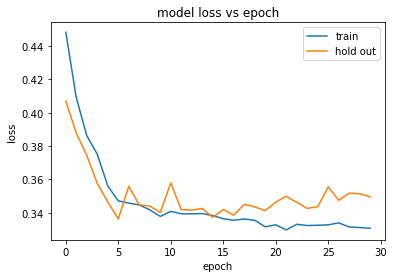

loss and accuracy of the test-set with the corresponding model: (0.33798378705978394, 0.8560000061988831)


In [190]:
model=unreg_three_layer_model_config(12,8)
comp(model,0.01)
history=fit_model(model,32)
plot_model(history)
print("loss and accuracy of the test-set with the corresponding model:",get_loss_acc(x_test,y_test,model))

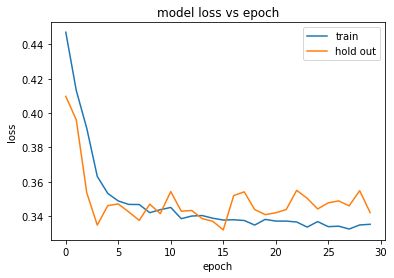

loss and accuracy of the test-set with the corresponding model: (0.33071404695510864, 0.8610000014305115)


In [191]:
model=unreg_four_layer_model_config(12,12,8)
comp(model,0.01)
history=fit_model(model,32)
plot_model(history)
print("loss and accuracy of the test-set with the corresponding model:",get_loss_acc(x_test,y_test,model))

You can obviously see that the unregularized model is overfitting the training set; so, we're going to use a regularize version.

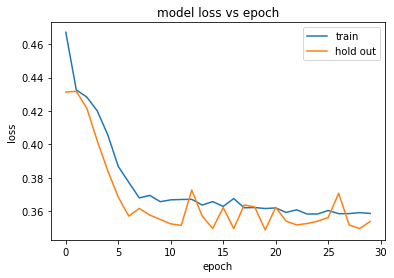

loss and accuracy of the test-set with the corresponding model: (0.33900725841522217, 0.8679999709129333)


In [192]:
model=reg_three_layer_model_config(12,8)
comp(model,0.01)
history=fit_model(model,32)
plot_model(history)
print("loss and accuracy of the test-set with the corresponding model:",get_loss_acc(x_test,y_test,model))

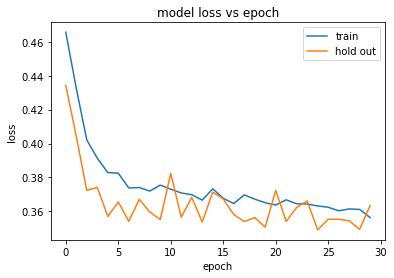

loss and accuracy of the test-set with the corresponding model: (0.351778507232666, 0.859000027179718)


In [193]:
model=reg_four_layer_model_config(12,12,8)
comp(model,0.01)
history=fit_model(model,32)
plot_model(history)
print("loss and accuracy of the test-set with the corresponding model:",get_loss_acc(x_test,y_test,model))

Our model is no longer overfitting. It's time to find the best setting for number of units in each layer. 
We are gonna try different values in the following blocks

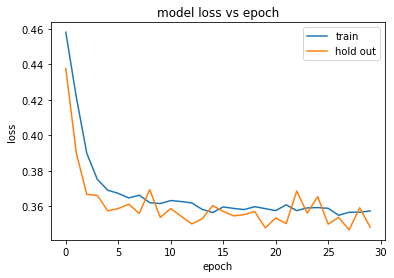

loss and accuracy of the test-set with the corresponding model: (0.32425469160079956, 0.8669999837875366)


In [194]:
model=reg_three_layer_model_config(11,7)
comp(model,0.01)
history=fit_model(model,32)
plot_model(history)
print("loss and accuracy of the test-set with the corresponding model:",get_loss_acc(x_test,y_test,model))

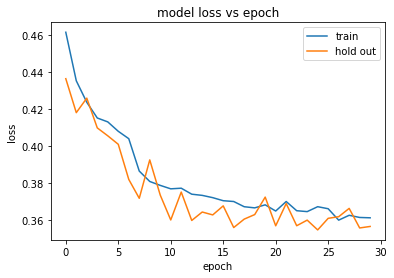

loss and accuracy of the test-set with the corresponding model: (0.34125614166259766, 0.8489999771118164)


In [195]:
model=reg_four_layer_model_config(11,11,7)
comp(model,0.01)
history=fit_model(model,32)
plot_model(history)
print("loss and accuracy of the test-set with the corresponding model:",get_loss_acc(x_test,y_test,model))

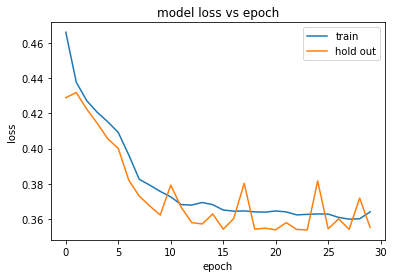

loss and accuracy of the test-set with the corresponding model: (0.3341425955295563, 0.8579999804496765)


In [196]:
model=reg_three_layer_model_config(10,6)
comp(model,0.01)
history=fit_model(model,32)
plot_model(history)
print("loss and accuracy of the test-set with the corresponding model:",get_loss_acc(x_test,y_test,model))

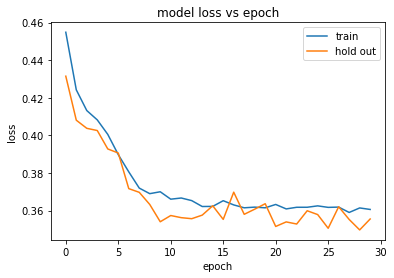

loss and accuracy of the test-set with the corresponding model: (0.33709517121315, 0.8669999837875366)


In [197]:
model=reg_four_layer_model_config(10,10,6)
comp(model,0.01)
history=fit_model(model,32)
plot_model(history)
print("loss and accuracy of the test-set with the corresponding model:",get_loss_acc(x_test,y_test,model))

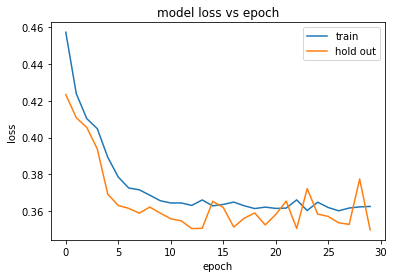

loss and accuracy of the test-set with the corresponding model: (0.33490607142448425, 0.8569999933242798)


In [198]:
model=reg_four_layer_model_config(9,5)
comp(model,0.01)
history=fit_model(model,32)
plot_model(history)
print("loss and accuracy of the test-set with the corresponding model:",get_loss_acc(x_test,y_test,model))

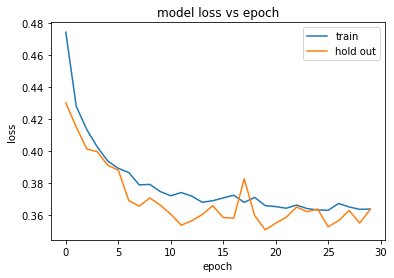

loss and accuracy of the test-set with the corresponding model: (0.3538166284561157, 0.8519999980926514)


In [199]:
model=reg_four_layer_model_config(9,9,5)
comp(model,0.01)
history=fit_model(model,32)
plot_model(history)
print("loss and accuracy of the test-set with the corresponding model:",get_loss_acc(x_test,y_test,model))

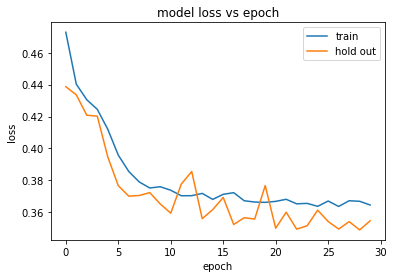

loss and accuracy of the test-set with the corresponding model: (0.3375251293182373, 0.8550000190734863)


In [200]:
model=reg_three_layer_model_config(8,4)
comp(model,0.01)
history=fit_model(model,32)
plot_model(history)
print("loss and accuracy of the test-set with the corresponding model:",get_loss_acc(x_test,y_test,model))

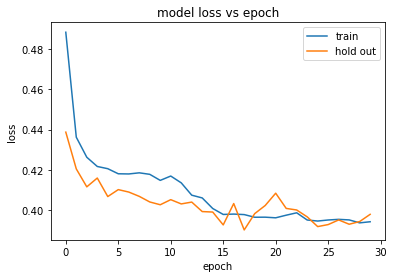

loss and accuracy of the test-set with the corresponding model: (0.38486072421073914, 0.8460000157356262)


In [201]:
model=reg_four_layer_model_config(8,8,4)
comp(model,0.01)
history=fit_model(model,32)
plot_model(history)
print("loss and accuracy of the test-set with the corresponding model:",get_loss_acc(x_test,y_test,model))

We choose a three layer network with (11,7) for number of units in each layer because it seems more robust

##### hyperparameter tunning for learning rate and mini batch size

In [204]:
lr=[0.001,0.005,0.01,0.05,0.1]
bs=[32,64,128]
for i in range(len(lr)):
    for j in range(len(bs)):
        model=reg_three_layer_model_config(11,7)
        comp(model,lr[i])
        history=fit_model(model,bs[j])
        print(f"test-set's loss and accuracy for learning rate {lr[i]}and batch size {bs[j]} is :")
        print(get_loss_acc(x_test,y_test,model))
        print("\n")

test-set's loss and accuracy for learning rate 0.001and batch size 32 is :
(0.3573421835899353, 0.8550000190734863)


test-set's loss and accuracy for learning rate 0.001and batch size 64 is :
(0.3659810423851013, 0.8460000157356262)


test-set's loss and accuracy for learning rate 0.001and batch size 128 is :
(0.3764572739601135, 0.843999981880188)


test-set's loss and accuracy for learning rate 0.005and batch size 32 is :
(0.3482896089553833, 0.859000027179718)


test-set's loss and accuracy for learning rate 0.005and batch size 64 is :
(0.33645546436309814, 0.8650000095367432)


test-set's loss and accuracy for learning rate 0.005and batch size 128 is :
(0.33648911118507385, 0.859000027179718)


test-set's loss and accuracy for learning rate 0.01and batch size 32 is :
(0.34849870204925537, 0.8550000190734863)


test-set's loss and accuracy for learning rate 0.01and batch size 64 is :
(0.34096160531044006, 0.859000027179718)


test-set's loss and accuracy for learning rate 0.01and b

from above hyperparameter search we conclude that the best learning rate is 0.005. Additionally the best value for mini batch size is 64.


So our final model is as follows:

A 3 layer network with 3 hidden layer with structure of L1:11 units, L2:7 units and L3:1 unit.

A learning rate of 0.005 with batch size of 64 :


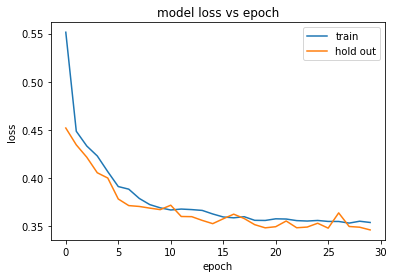

loss and accuracy of the test-set with the corresponding model: (0.32637161016464233, 0.8690000176429749)


In [205]:
model=reg_four_layer_model_config(11,7)
comp(model,0.005)
history=fit_model(model,64)
plot_model(history)
print("loss and accuracy of the test-set with the corresponding model:",get_loss_acc(x_test,y_test,model))

a summary of our layers' structure:

In [206]:
model.summary()

Model: "sequential_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_294 (Dense)            (None, 11)                154       
_________________________________________________________________
dense_295 (Dense)            (None, 7)                 84        
_________________________________________________________________
dense_296 (Dense)            (None, 8)                 64        
_________________________________________________________________
dense_297 (Dense)            (None, 1)                 9         
Total params: 311
Trainable params: 311
Non-trainable params: 0
_________________________________________________________________


________________________________________________________

In [207]:
model.save_weights('C:/Users/Saberi/Desktop/New folder/neural network/my_model')